In [278]:
import pandas as pd
df = pd.read_csv('placement.csv')
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1



# Steps

0. Preprocess + EDA + Feature Selection
1. Extract input and output cols
2. Scale the values
3. Train test split
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model

In [279]:
# check if null  exist
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [280]:
df = df.iloc[:,1:]  #rows all, col after 1
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


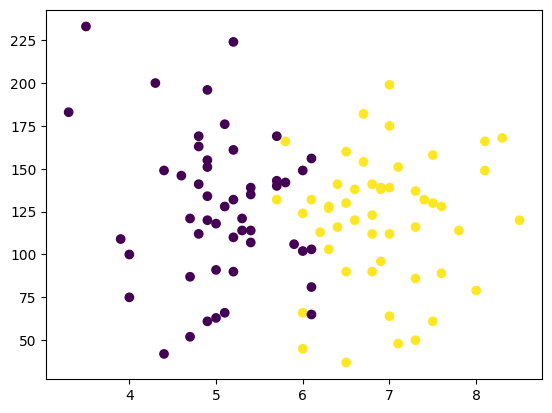

In [281]:
# EDA : give idea which algo might be best
import matplotlib.pyplot as plt  
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])  # color to know whose placement done

In [282]:
# use logistic regression that divide data into two regions
# Extract i/p and o/p columns
# X independent var
X = df.iloc[:,0:2] #need col 0 and 1
Y = df.iloc[:,-1] #last col

In [283]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [284]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [285]:
# Train the split
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1) #arg: independent var, dep var, 90% as training , 10% as test
X_train

,cgpa,iq
35,6.8,90.0
2,5.3,121.0
44,7.5,61.0
76,4.9,155.0
68,4.0,75.0
...,...,...
42,7.6,89.0
86,5.1,128.0
7,5.0,63.0
16,5.2,224.0


In [286]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [287]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.6914615 , -0.83316238],
       [-0.62328924, -0.04625546],
       [ 1.30501185, -1.56930112],
       [-0.97388944,  0.81680375],
       [-1.76273989, -1.2139238 ],
       [ 0.34086131,  0.46142643],
       [-1.06153949,  1.17218107],
       [-0.27268904,  1.17218107],
       [-0.79858934,  1.34986973],
       [-0.71093929,  0.23296958],
       [-1.06153949,  0.46142643],
       [ 1.83091215,  1.09602878],
       [-1.23683959,  0.5883469 ],
       [-0.27268904,  0.23296958],
       [-0.53563919,  0.41065824],
       [ 0.42851136, -2.17851938],
       [ 0.95441165,  0.71526737],
       [-0.53563919, -0.22394412],
       [ 0.8667616 , -0.27471231],
       [ 0.95441165, -1.89929435],
       [-0.88623939, -0.80777829],
       [-0.27268904,  0.43604233],
       [ 1.30501185,  0.18220139],
       [ 0.25321126, -0.50316916],
       [ 0.6914615 ,  0.00451273],
       [-1.14918954, -0.04625546],
       [ 0.07791116,  0.84218784],
       [ 0.77911155,  0.38527414],
       [ 0.07791116,

In [288]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.42851136,  0.18220139],
       [-0.00973889, -0.52855325],
       [-0.97388944,  0.28373777],
       [ 0.6914615 ,  0.46142643],
       [-2.20099014,  2.7967631 ],
       [-0.00973889, -1.44238065],
       [-1.41213969,  0.66449918],
       [ 0.42851136, -0.83316238],
       [ 0.51616141, -0.07163956],
       [ 0.77911155,  0.41065824]])

In [289]:
from sklearn.linear_model import  LogisticRegression 
clf = LogisticRegression()

In [290]:
# model training
clf.fit(X_train,Y_train)

LogisticRegression()

In [291]:
# Evaluate
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [292]:
Y_test

57    1
62    0
40    0
43    1
50    0
45    1
88    0
79    1
20    1
60    1
Name: placement, dtype: int64

In [293]:
from sklearn.metrics import accuracy_score

print(f"{accuracy_score(Y_test,y_pred) * 100}%")

90.0%


<Axes: >

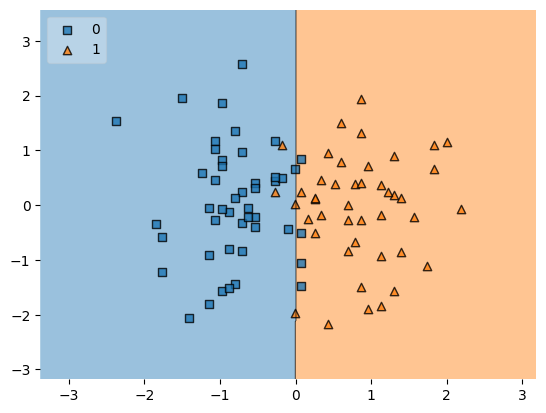

In [295]:
# from net to show visual
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train,Y_train.values,clf = clf,legend=2)

In [ ]:
# get file which contain our predictor
import pickle
pickle.dump(clf,open('model.pkl','wb'))